# Machine Learning Assignment 3
### Lamya Daakir                          
ldaakir3                           
GTID# : 903529703                 
CS 7641

# Importing the necessary libraries

In [214]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
sns.set()
from pandas import Series, DataFrame
from sklearn.metrics import plot_confusion_matrix
import time
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

# Plotting

### https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.htm

In [215]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [216]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import seaborn as sns
# sns.set()
from pandas import Series, DataFrame
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score,pairwise_distances_argmin
import timeit
from matplotlib.legend_handler import HandlerLine2D
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold, train_test_split,cross_val_score,cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score

    
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(25, 6))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt

# https://github.com/BlackArbsCEO/Mixture_Models/blob/K-Means,-E-M,-Mixture-Models/E-M%2C%20K-Means%2C%20Mixture%20Models.ipynb

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) 
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


# Metrics of em:
def metrics_EM(em, X, y):
    start_time = timeit.default_timer()
    em.fit(X, y)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    labels = em.predict(X)
    y_mode_vote = cluster_predictions(y,labels)
    accuracy = accuracy_score(y, y_mode_vote)
#     print("Model Evaluation Metrics Using Mode Cluster Vote")
    print("Model Training Time (s):   "+"{:.2f}".format(training_time))
    print("No. Iterations to Converge: {}".format(em.n_iter_))
    print("Accuracy:  "+"{:.2f}".format(accuracy))
    
    

In [217]:
# https://github.com/BlackArbsCEO/Mixture_Models/blob/K-Means,-E-M,-Mixture-Models/E-M%2C%20K-Means%2C%20Mixture%20Models.ipynb

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) 
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


# Metrics of em:
def metrics_EM(em, X, y):
    start_time = timeit.default_timer()
    em.fit(X, y)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    labels = em.predict(X)
    y_mode_vote = cluster_predictions(y,labels)
    accuracy = accuracy_score(y, y_mode_vote)
#     print("Model Evaluation Metrics Using Mode Cluster Vote")
    print("Model Training Time (s):   "+"{:.2f}".format(training_time))
    print("No. Iterations to Converge: {}".format(em.n_iter_))
    print("Accuracy:  "+"{:.2f}".format(accuracy))



# Data Analysis

In [218]:
dataset = pd.read_csv('ionosphere.csv', header = None)

In [219]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
1,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.1904,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1,-0.45161,1,1,0.71216,-1,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,b
3,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.0324,0.09223,-0.07859,0.00732,0,0,-0.00039,0.12011,b
4,0,0,0,0,0,0,1,-1,0,0,...,1,1,1,0,0,1,1,0,0,b


In [220]:
dataset.dropna()
dataset.shape
X = dataset.iloc[1:, 0:33].values
Y = dataset.iloc[1:,34].values

In [221]:
X.shape


(351, 33)

In [222]:
Y.shape


(351,)

In [223]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0]

array([ 0.34843328,  0.        ,  0.72164805, -0.52781074,  0.63430773,
       -1.03758697, -1.33910577, -2.02945199,  0.96407416, -0.46948184,
        0.05785987, -1.68478062, -0.09090821, -1.599628  , -1.32077439,
       -2.28587042, -0.52979769, -1.24735087, -0.04525228, -1.88290035,
       -0.76886206, -0.8915184 , -0.90069558, -0.56945458, -1.03778979,
       -0.38305389, -1.44784862, -0.20841918, -0.9891848 , -0.17352964,
       -0.90906286, -0.11521328, -0.93260505])

In [224]:
X[0]
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.348433,0.0,0.721648,-0.527811,0.634308,-1.037587,-1.339106,-2.029452,0.964074,-0.469482,...,-0.569455,-1.037790,-0.383054,-1.447849,-0.208419,-0.989185,-0.173530,-0.909063,-0.115213,-0.932605
1,0.348433,0.0,0.721648,-1.125172,0.768477,1.921340,0.329433,-2.152585,-1.010873,-0.375331,...,0.108990,1.045426,1.926340,-0.049490,1.947300,1.080843,-0.341218,-0.167687,1.957315,-1.289826
2,0.348433,0.0,-1.243407,-0.114091,-1.349028,-0.511523,-1.133699,-0.456917,-0.720437,-0.237965,...,0.125850,-0.624980,0.109965,-1.113629,0.294529,-0.794754,0.069447,-0.617720,0.007398,-0.670131
3,-2.869990,0.0,-1.290430,-0.100661,-1.157858,-0.251849,0.914531,-2.152585,-1.010873,-0.375331,...,0.108990,1.045426,2.109592,0.889208,1.947300,-0.658092,0.055016,1.134610,1.957315,-0.669384
4,0.348433,0.0,-1.327935,-0.292560,-1.157858,-0.251849,-1.118190,-0.229536,-0.784346,-0.930218,...,0.108990,-0.942070,0.114081,-0.650264,0.084840,-0.658092,0.055016,-0.326921,0.477055,-0.826650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.348433,0.0,0.389816,0.087585,0.262602,-0.571438,0.596390,-0.336592,0.775289,-0.470993,...,0.234640,0.965408,0.057441,0.568704,0.128846,1.080843,0.307653,0.900849,-0.201517,1.065485
347,0.348433,0.0,0.623318,-0.091156,0.675685,-0.311025,0.781144,-0.266458,0.857230,-0.342092,...,0.300502,0.950555,0.166999,0.763536,0.216276,0.961883,0.216042,1.030626,0.006715,1.083438
348,0.348433,0.0,0.615028,-0.101432,0.637621,-0.321978,0.816493,-0.295516,0.876860,-0.324706,...,0.225716,0.941344,0.203078,0.743496,0.172889,0.943815,0.099216,1.002467,0.016016,1.106699
349,0.348433,0.0,0.532674,-0.138251,0.732300,-0.295073,0.826941,-0.299650,0.682565,-0.373054,...,0.064943,0.890481,0.098858,0.678662,-0.014679,0.784929,-0.284816,1.064902,-0.065861,1.005265


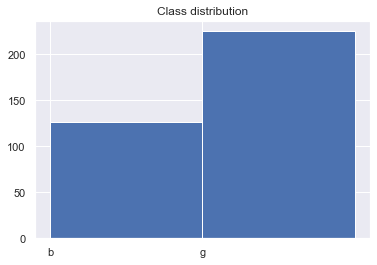

In [225]:
Y
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(Y,bins=[0,1,2])
plt.title("Class distribution")
plt.show()
# print(np.mean(Y))

# Training and test dataset

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [227]:
pd.DataFrame(pd.DataFrame(Y_train)[0].value_counts())

,0
g,180
b,100


In [228]:
pd.DataFrame(pd.DataFrame(Y_test)[0].value_counts())

,0
g,45
b,26


# K-means clustering

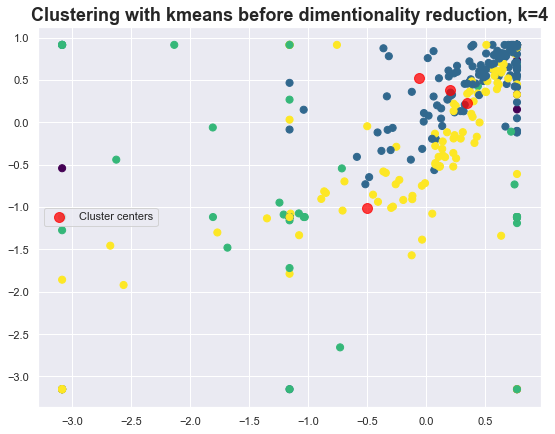

In [241]:
km = KMeans(n_clusters=4)
cluster = km.fit(X)
k=4
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(X.iloc[:, 4], X.iloc[:,6], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 2], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans before dimentionality reduction, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

Score for number of cluster(s) 2: -8737.049805719886
Silhouette score for number of cluster(s) 2: 0.27734942247054956
Score for number of cluster(s) 3: -7940.47540427073
Silhouette score for number of cluster(s) 3: 0.2944161036418202
Score for number of cluster(s) 4: -7183.405637708957
Silhouette score for number of cluster(s) 4: 0.30547474546394643
Score for number of cluster(s) 5: -6844.050711949133
Silhouette score for number of cluster(s) 5: 0.253601512765565
Score for number of cluster(s) 6: -6620.364421815147
Silhouette score for number of cluster(s) 6: 0.21463631186708199
Score for number of cluster(s) 7: -6400.058486541631
Silhouette score for number of cluster(s) 7: 0.16042026121813144
Score for number of cluster(s) 8: -6103.797245221075
Silhouette score for number of cluster(s) 8: 0.17885718665623646
Score for number of cluster(s) 9: -6001.777275708802
Silhouette score for number of cluster(s) 9: 0.17964494663252648
Score for number of cluster(s) 10: -5751.971566628236
Silhou

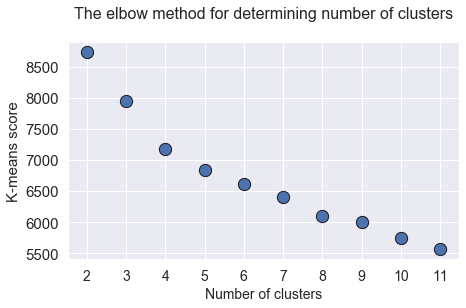

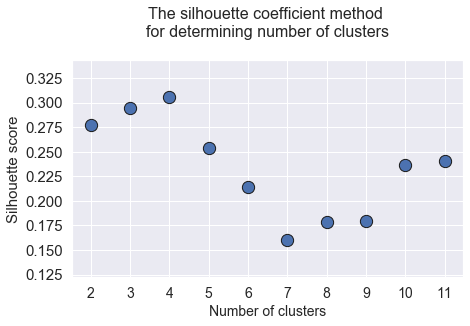

In [153]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

X_scaled=X
km_scores=[]
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

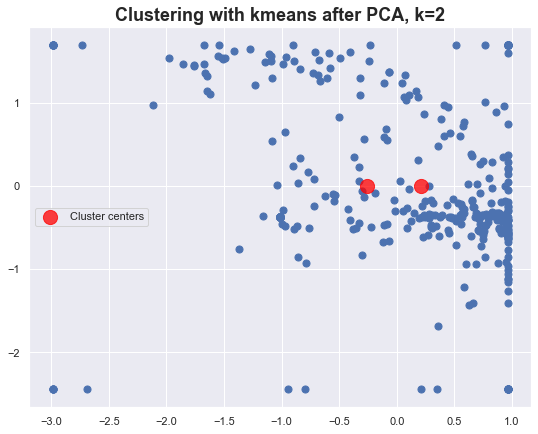

In [244]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
cluster = km.fit(X)
k=2
# centers, labels = find_clusters(X, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(X.iloc[:, 8], X.iloc[:, 9],s=dot_size, cmap=cmap)
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

# EM

In [245]:
random_seed=12
n_components = np.arange(2, 31)
BIC = np.zeros(n_components.size)
for i, n in enumerate(n_components):
    em = EM(n_components=n, random_state=random_seed)
    em.fit(X)
    BIC[i] = em.bic(X)

# components for seismic dataset:  3


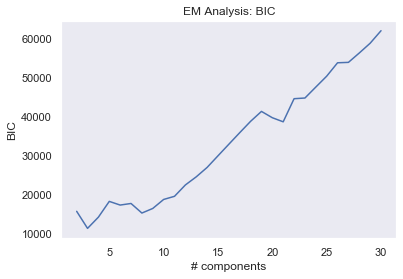

In [246]:
plt.figure()
plt.plot(n_components,BIC)
plt.xlabel('# components')
plt.ylabel('BIC')
plt.title('EM Analysis: BIC')
plt.grid()
print('# components for seismic dataset: ', n_components[np.argmin(BIC)])

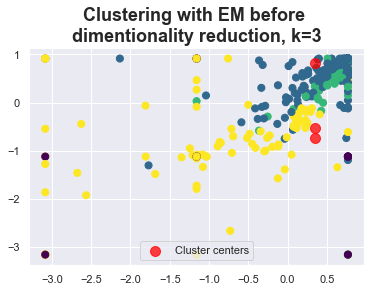

In [307]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import mixture


em = EM(n_components=3,  random_state=random_seed, covariance_type='full').fit(X)
plt.title('find_clusters() k-means func', fontsize=18, fontweight='demi')
# plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(X.iloc[:, 4],X.iloc[:, 6], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, X.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(X)
    centers[i, :] = X.iloc[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 6], c='red', s=100, alpha=0.75, label='Cluster centers')
k=3

plt.title('Clustering with EM before \ndimentionality reduction, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

# 2. Dimentionality reduction algo

In [253]:
from sklearn.decomposition import PCA
pca_reducer = PCA(n_components=28)
pca_reduced_data = pca_reducer.fit_transform(X)
pca_reduced_data.shape

(351, 28)

In [254]:
# https://etav.github.io/python/scikit_pca.html
# Create a Covariance Matrix
covar_matrix_pca = PCA(n_components = 33)
# Calculate Eigenvalues
x_pca=covar_matrix_pca.fit(X)
variance_pca = covar_matrix_pca.explained_variance_ratio_ #calculate variance ratios
var_pca=np.cumsum(np.round(covar_matrix_pca.explained_variance_ratio_, decimals=3)*100)
var_pca #cumulative sum of variance explained with [n] features
eigenvalues=np.round(covar_matrix_pca.singular_values_)
var_pca


array([27.5, 40.4, 48.9, 55.2, 61.2, 64.8, 68.2, 71.3, 74.2, 76.8, 79.2,
       81.3, 83.1, 84.8, 86.3, 87.8, 89.2, 90.5, 91.7, 92.8, 93.8, 94.7,
       95.5, 96.2, 96.9, 97.5, 98. , 98.5, 98.9, 99.3, 99.6, 99.8, 99.8])

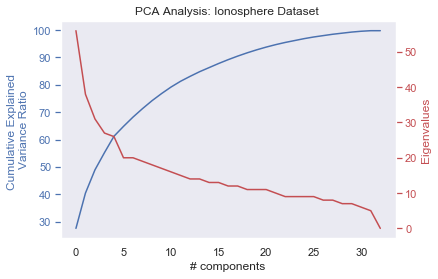

In [255]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict


cum_var = np.cumsum(covar_matrix_pca.explained_variance_ratio_)
fig, ax1 = plt.subplots()
ax1.plot( var_pca, 'b-')
ax1.set_xlabel('# components')
ax1.set_ylabel('Cumulative Explained \nVariance Ratio', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)
ax2 = ax1.twinx()
ax2.plot( eigenvalues, 'r-')
ax2.set_ylabel('Eigenvalues', color='r')
ax2.tick_params('y', colors='r')
plt.grid(False)
plt.xlabel("# components")
plt.title("PCA Analysis: Ionosphere Dataset ")
plt.show()

# ICA

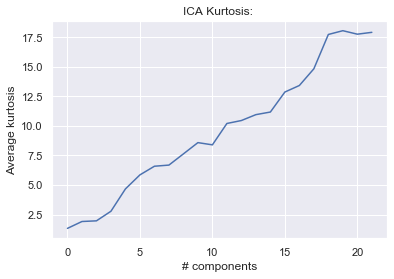

In [275]:
from sklearn.decomposition import FastICA
ica_reducer = FastICA(n_components=24)
ica_reduced_data = ica_reducer.fit_transform(X)
ica_reduced_data.shape
kurtosis=[]
for i in range(2,24):
    ica_reducer = FastICA(n_components=i)
    ica_reduced_data = ica_reducer.fit_transform(X)
    ica_reduced_data = pd.DataFrame(ica_reduced_data)
    ica_reduced_data = ica_reduced_data.kurt(axis=0)
#     kurtosis.append(ica_reduced_data.mean())
    kurtosis.append(ica_reduced_data.abs().mean())
#     print(ica_reduced_data.abs().mean())
plt.figure()
plt.plot(kurtosis)
plt.title("ICA Kurtosis: ")
plt.xlabel("# components")
plt.ylabel("Average kurtosis")
plt.show()


# RP

In [277]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=2)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

(351, 2)

# Truncated SVD

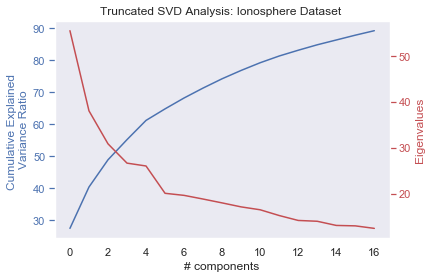

In [279]:
# pca_reducer = TruncatedSVD(n_components=12)
# pca_reduced_data = pca_reducer.fit_transform(X)
# pca_reduced_data.shape

from sklearn.decomposition import TruncatedSVD


covar_matrix_svd=TruncatedSVD(n_components=17)

x_svd=covar_matrix_svd.fit(X)
srp_reduced_data=x_svd
variance_svd = covar_matrix_svd.explained_variance_ratio_ #calculate variance ratios
var_svd=np.cumsum(np.round(covar_matrix_svd.explained_variance_ratio_, decimals=3)*100)
var_svd #cumulative sum of variance explained with [n] features
eigenvalues_svd=covar_matrix_svd.singular_values_

fig, ax1 = plt.subplots()
ax1.plot(var_svd, 'b-')
ax1.set_xlabel('# components')
ax1.set_ylabel('Cumulative Explained \nVariance Ratio', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)
ax2 = ax1.twinx()
ax2.plot(eigenvalues_svd, 'r-')
ax2.set_ylabel('Eigenvalues', color='r')
ax2.tick_params('y', colors='r')
plt.grid(False)
plt.title("Truncated SVD Analysis: Ionosphere Dataset ")
plt.show()

# Clustering after dimentionality reduction:¶

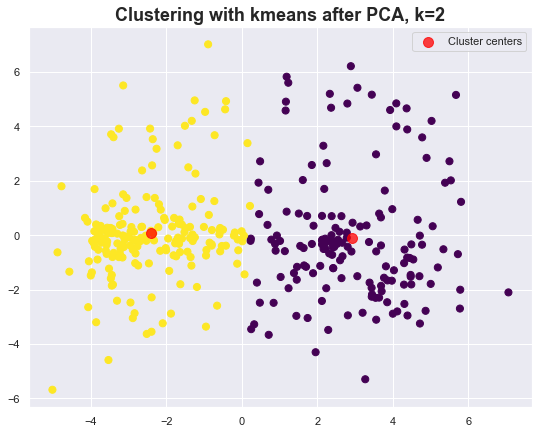

In [280]:
# K=2
km = KMeans(n_clusters=2)
cluster_pca = km.fit(pca_reduced_data)
k=2
centers, labels = find_clusters(pca_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_pca.cluster_centers_[:, 0], cluster_pca.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

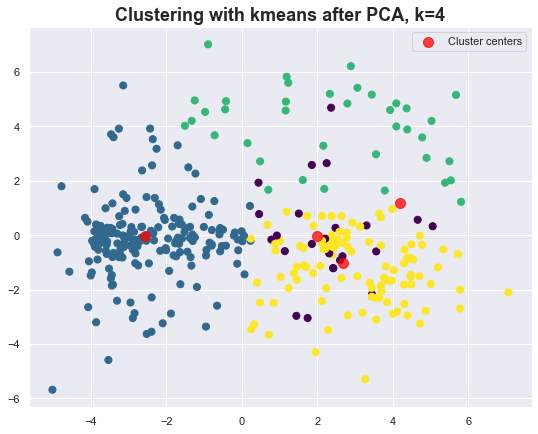

In [281]:
# k=3
pca_reduced_data_3=pca_reduced_data
# pca_reducer_3 = PCA(n_components=8)
# pca_reduced_data_3 = pca_reducer_3.fit_transform(X)
# pca_reduced_data_3.shape
km = KMeans(n_clusters=4)
cluster_pca_3 = km.fit(pca_reduced_data_3)
k=4
centers, labels = find_clusters(pca_reduced_data_3, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_3[:, 0], pca_reduced_data_3[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_pca_3.cluster_centers_[:, 0], cluster_pca_3.cluster_centers_[:, 3], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

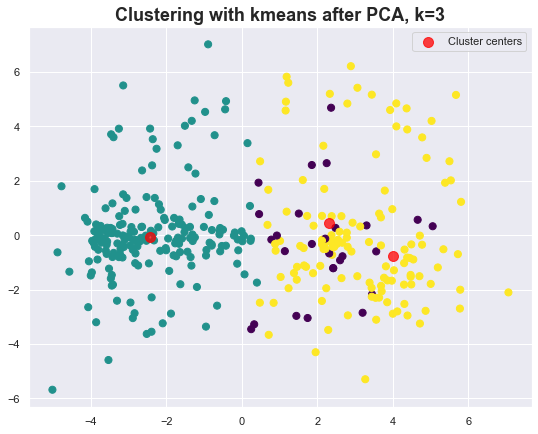

In [282]:
 # k=3
pca_reduced_data_3=pca_reduced_data
# pca_reducer_3 = PCA(n_components=8)
# pca_reduced_data_3 = pca_reducer_3.fit_transform(X)
# pca_reduced_data_3.shape
km = KMeans(n_clusters=3)
cluster_pca_3 = km.fit(pca_reduced_data_3)
k=3
centers, labels = find_clusters(pca_reduced_data_3, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_3[:, 0], pca_reduced_data_3[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_pca_3.cluster_centers_[:, 0], cluster_pca_3.cluster_centers_[:, 3], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after PCA, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

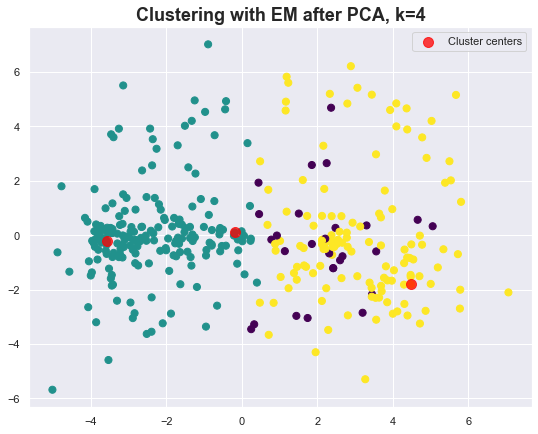

In [283]:

# k=4
pca_reduced_data_4=pca_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=3,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=3
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after PCA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

In [285]:

km = KMeans(n_clusters=3)
cluster_ica = km.fit(ica_reduced_data)
k=3
centers, labels = find_clusters(ica_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(ica_reduced_data[:, 0], ica_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_ica.cluster_centers_[:, 0], cluster_ica.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after ICA, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.01680627 19.83372623 26.95518258 17.70345842 34.65819992 20.48753077
  5.32666696 29.45475453 20.03671123 14.54749378 13.88121171 29.13027336
 11.79245419  2.7582297  15.48036815 13.11881658 12.07166233 25.03769327
 17.43107412  8.05663613 18.13760965 13.19074227 38.74028547].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

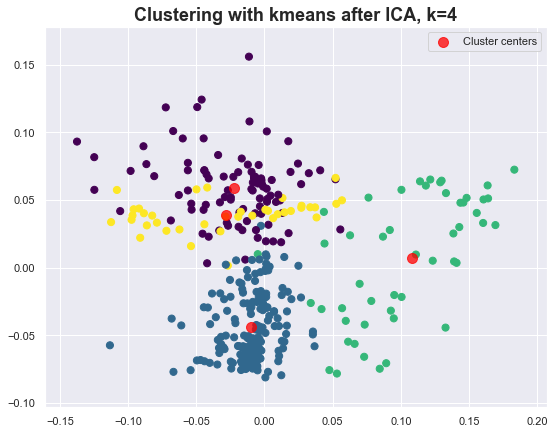

In [290]:
from sklearn.decomposition import FastICA
ica_reducer = FastICA(n_components=4)
ica_reduced_data = ica_reducer.fit_transform(X)
ica_reduced_data_3=ica_reduced_data
km = KMeans(n_clusters=4)
cluster_ica_3 = km.fit(ica_reduced_data_3)
k=4
centers, labels = find_clusters(ica_reduced_data_3, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(ica_reduced_data_3[:, 0], ica_reduced_data_3[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_ica_3.cluster_centers_[:, 0], cluster_ica_3.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after ICA, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

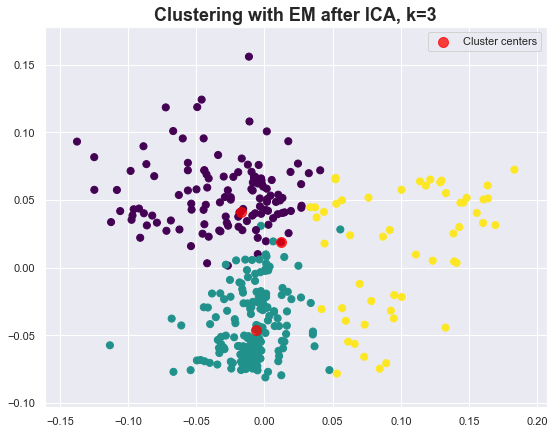

In [291]:

# k=4
pca_reduced_data_4=ica_reduced_data
pca_reduced_data=ica_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=3,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=3
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after ICA, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

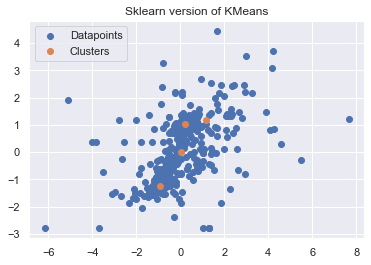

In [202]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=18)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape
reduced_data=rp_reduced_data

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
cluster = km.fit(rp_reduced_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

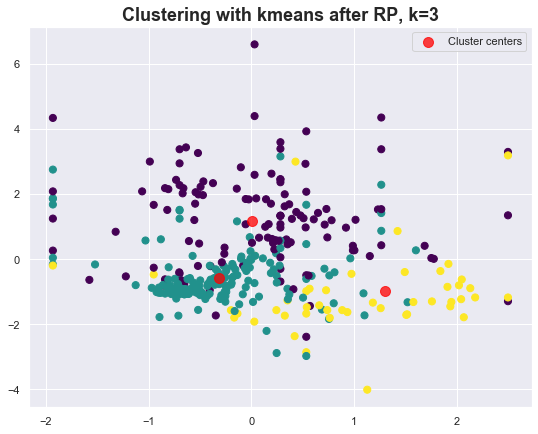

In [298]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=18)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

km = KMeans(n_clusters=3)
cluster_rp = km.fit(rp_reduced_data)
k=3
centers, labels = find_clusters(rp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(rp_reduced_data[:, 0], rp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_rp.cluster_centers_[:, 0], cluster_rp.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after RP, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

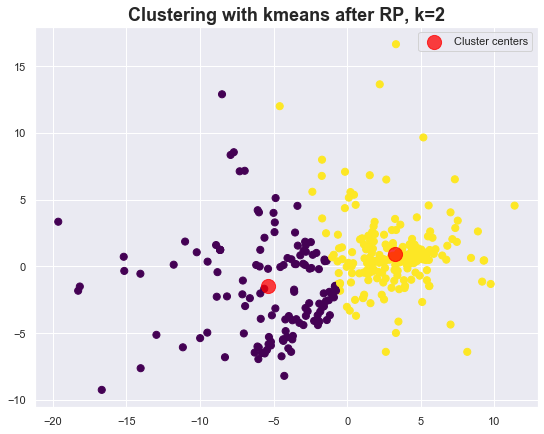

In [205]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RP

rp_reducer = RP(n_components=2)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

km = KMeans(n_clusters=2)
cluster_rp = km.fit(rp_reduced_data)
k=2
centers, labels = find_clusters(rp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(rp_reduced_data[:, 0], rp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_rp.cluster_centers_[:, 0], cluster_rp.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after RP, k=2', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

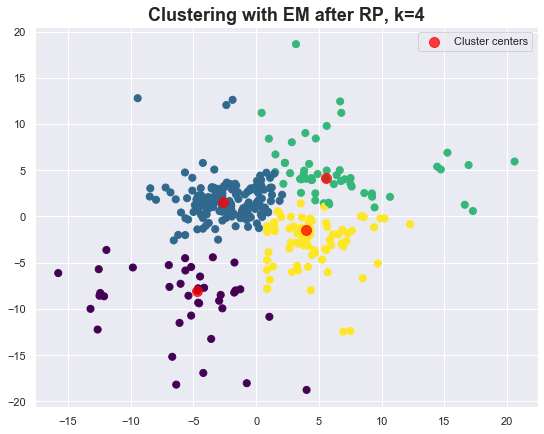

In [301]:

rp_reducer = RP(n_components=2)
rp_reduced_data = rp_reducer.fit_transform(X)
rp_reduced_data.shape

# k=4
pca_reduced_data_4=rp_reduced_data
pca_reduced_data=rp_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(rp_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=4
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after RP, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

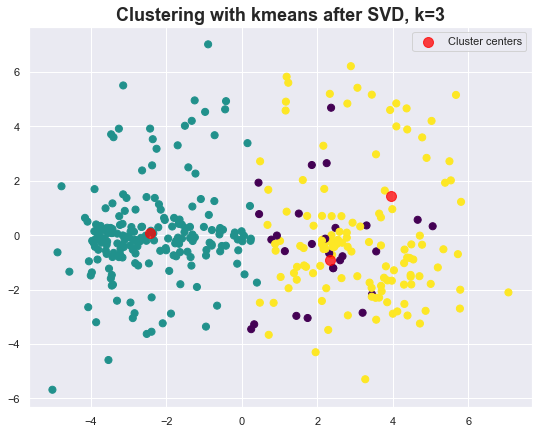

In [303]:
srp_reducer = TruncatedSVD(n_components=12)
srp_reduced_data = pca_reducer.fit_transform(X)
srp_reduced_data.shape


# srp_reduced_data
km = KMeans(n_clusters=3)
cluster_srp = km.fit(srp_reduced_data)
k=3
centers, labels = find_clusters(srp_reduced_data, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(srp_reduced_data[:, 0], srp_reduced_data[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.scatter(cluster_srp.cluster_centers_[:, 0], cluster_srp.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with kmeans after SVD, k=3', fontsize=18, fontweight='demi')
plt.legend()
plt.show()

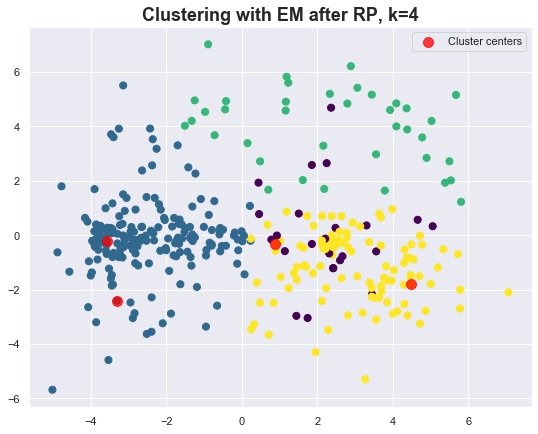

In [305]:


# k=4
pca_reduced_data_4=srp_reduced_data
pca_reduced_data=srp_reduced_data
# em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(pca_reduced_data)
pca_reducer_4 = PCA(n_components=12)
# pca_reduced_data_4 = pca_reducer_4.fit_transform(X)
pca_reduced_data_4.shape
em = EM(n_components=4,  random_state=random_seed, covariance_type='full').fit(rp_reduced_data)
cluster_pca_4 = em.fit(pca_reduced_data_4)
k=4
centers, labels = find_clusters(pca_reduced_data_4, k)
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(pca_reduced_data_4[:, 0], pca_reduced_data_4[:, 1], c=labels, s=dot_size, cmap=cmap)
centers = np.empty(shape=(em.n_components, pca_reduced_data.shape[1]))
for i in range(em.n_components):
    density = scipy.stats.multivariate_normal(cov=em.covariances_[i], mean=em.means_[i]).logpdf(pca_reduced_data)
    centers[i, :] = pca_reduced_data[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
# plt.scatter(cluster_pca_4.cluster_centers_[:, 0], cluster_pca_4.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, label='Cluster centers')
plt.title('Clustering with EM after RP, k=4', fontsize=18, fontweight='demi')
plt.legend()
plt.show()